In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
Most Important columns: Order Date, Segment, Category, Sales, Quantity, Discount, Proft

Still Important columns: Ship Date, Ship Mode, City, State, Region, SUb-Category

Dropable columns: Row ID, Order ID, Customer ID, Customer Name, Country(for this, else useful), Postal Code.

Maybe Useful: Product ID, Product Name

This dataset allows you to analyze:
    Sales trends over time
    Which products make money
    Which customers are valuable
    Which regions perform well
    How discounts affect profit

SyntaxError: invalid syntax (1459800467.py, line 1)

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.dtypes

In [ ]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

df[['Order Date', 'Order Year', 'Order Month',  'Order Month Name']].head()

#If you know the format, you should specify it:
#pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

This lets you answer:
    *Which year had highest sales?
    *Which month is strongest?
    *Is there seasonality?

In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit

#this gives us total sales and total profit

In [ ]:
sales_by_year = df.groupby('Order Year')['Sales'].sum().reset_index()
sales_by_year

#is he business growing or not?

In [ ]:
profit_by_year = df.groupby('Order Year')['Profit'].sum().reset_index()
profit_by_year

# is the business profitable?

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Order Year', y= 'Sales', data=sales_by_year)
plt.title('Total Sales by Year')
plt.show()

# sale by year plot

plt.figure(figsize=(8,5))
sns.barplot(x='Order Year', y= 'Profit', data=profit_by_year)
plt.title('Total Profit by Year')
plt.show()

#profit by year plot

Although total sales experienced a slight decline in 2015, overall profitability increased, indicating improved cost efficiency or a shift towards higher-margin products during that period.

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

category_sales
category_profit

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by category')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by category')
plt.show()

Technology is top-selling, but Furniture and Office Supplies are nearly equal. Tech is ahead by ~1.5M from Office Supplies.
But profits show a huge contrast: Technology and Office Supplies carry profits, Furniture barely reaches 20k.

Despite Furniture contributing almost equal sales to Office Supplies, it generates disproportionately low profit, indicating either high costs, heavy discounting, or operational inefficiencies in this category.

In [6]:
subcat_profit = df.groupby(['Category','Sub-Category'])['Profit'].sum().reset_index()
subcat_profit
subcat_profit_sorted = subcat_profit.sort_values(by='Profit')
subcat_profit_sorted

,Category,Sub-Category,Profit
3,Furniture,Tables,-17725.4811
0,Furniture,Bookcases,-3472.5560
12,Office Supplies,Supplies,-1189.0995
8,Office Supplies,Fasteners,949.5182
15,Technology,Machines,3384.7569
9,Office Supplies,Labels,5546.2540
5,Office Supplies,Art,6527.7870
7,Office Supplies,Envelopes,6964.1767
2,Furniture,Furnishings,13059.1436
4,Office Supplies,Appliances,18138.0054


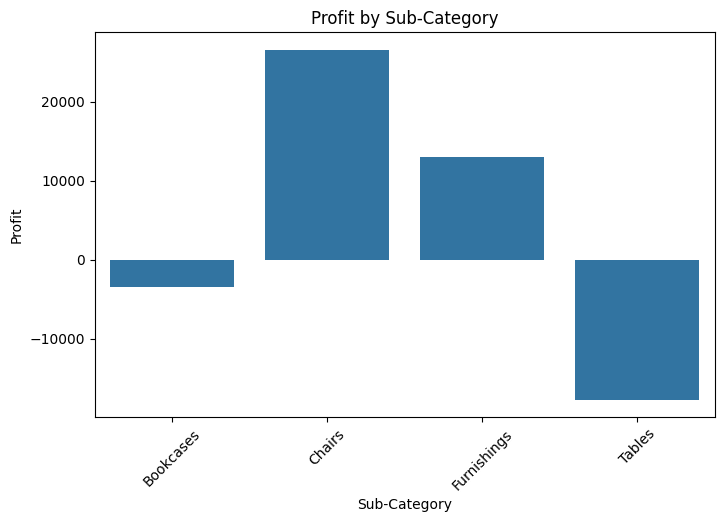

In [7]:
furniture_data = subcat_profit[subcat_profit['Category'] == 'Furniture']

plt.figure(figsize=(8,5))
sns.barplot(x='Sub-Category', y='Profit', data=furniture_data)
plt.title('Profit by Sub-Category')
plt.xticks(rotation=45)
plt.show()

While the Furniture category appears underperforming at an aggregate level, sub-category analysis reveals that Chairs and Furnishings are profitable, whereas Tables and Bookcases incur significant losses, driving the overall category profitability down

This suggests:

pricing issues on Tables

high logistics cost

excessive discounting

supplier margin problems